# 1.神经网络的复习

## 1.1 数学和Python的复习

In [1]:
# 向量和矩阵
import numpy as np
x = np.array([1, 2, 3])
W = np.array([[1, 2, 3], [4, 5, 6]])

print("x.__class__ : ", x.__class__)
print("x.shape = ", x.shape)
print("x.ndim = ", x.ndim)
print("W.shape = ", W.shape)
print("W.ndim = ", W.ndim)

x.__class__ :  <class 'numpy.ndarray'>
x.shape =  (3,)
x.ndim =  1
W.shape =  (2, 3)
W.ndim =  2


In [3]:
W = np.array([[1, 2, 3], [4, 5, 6]])
X = np.array([[0, 1, 2], [3, 4, 5]])
print("W + X = \n", W + X)
print("W * X = \n", W * X)
print("W.T @ X = \n", W.T @ X)

W + X = 
 [[ 1  3  5]
 [ 7  9 11]]
W * X = 
 [[ 0  2  6]
 [12 20 30]]
W.T @ X = 
 [[12 17 22]
 [15 22 29]
 [18 27 36]]


In [4]:
# 广播
A = np.array([[1, 2], [3, 4]])
print("A * 10 = \n", A * 10)
b = np.array([10, 20])
print("A * b = \n", A * b)

A * 10 = 
 [[10 20]
 [30 40]]
A * b = 
 [[10 40]
 [30 80]]


In [5]:
# 向量内积和矩阵相乘
# 矩阵的形状检查
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
print("np.dot(a, b) = ", np.dot(a, b))
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
print("np.dot(A,B) = \n", np.dot(A,B))

np.dot(a, b) =  32
np.dot(A,B) = 
 [[19 22]
 [43 50]]


## 1.2 神经网络的推理

In [46]:
# 神经网络推理的全貌图
import numpy as np
W1 = np.random.randn(2, 4)
b1 = np.random.randn(4)
x = np.random.randn(10, 2)
h = np.dot(x, W1) + b1

In [59]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(10, 2)
W1 = np.random.randn(2, 4)
b1 = np.random.randn(4)
W2 = np.random.randn(4, 3)
b2 = np.random.randn(3)

h = np.dot(x, W1) + b1
a = sigmoid(h)
s = np.dot(a, W2) + b2

In [69]:
# 层的类化及正向传播的实现

# sigmoid层
class Sigmoid:
    def __init__(self):
        self.params = []
        
    def forward(self, x):
        return 1 / (1 + np.exp(-x))
    
# Affine层
class Affine:
    def __init__(self, W, b):
        self.params = [W, b]
        
    def forward(self, x):
        W, b = self.params
        out = np.dot(x, W) + b
        return out

In [70]:
# 两层神经网络
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size
        
        # 初始化权重和配置
        W1 = np.random.randn(I, H)
        b1 = np.random.randn(H)
        W2 = np.random.randn(H, O)
        b2 = np.random.randn(O)
        
        # 生成层
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        
        # 将所有的权重整理到列表中
        self.params = []
        for layer in self.layers:
            self.params += layer.params
        
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

In [71]:
x = np.random.randn(10, 2)
model = TwoLayerNet(2, 4, 3)
s = model.predict(x)

## 1.3 神经网络的学习

In [74]:
# repeat节点
import numpy as np
D, N = 8, 7
x = np.random.randn(1, D)
y = np.repeat(x, N, axis = 0)
dy = np.random.randn(N, D)
dx = np.sum(dy, axis = 0, keepdims = True)


In [86]:
import numpy as np
D, N = 8, 7
x = np.random.randn(1, D)
y = np.sum(x, axis = 0, keepdims = True)

dy = np.random.randn(1, D)
dx = np.repeat(dy, N, axis = 0) 

In [98]:
# MatMul节点
class MatMul:
    def __init__(self, W):
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.x = None
        
    def forward(self, x):
        W, self.params
        out = np.dot(x, W)
        slef.x = x
        return out
    
    def backward(self, dout):
        W, = self.params
        dx = np.dot(dout, W.T)
        dW = np.dot(self.x.T, dout)
        self.gramds[0][...] = dW
        return dx

In [104]:
# 梯度的推导和反向传播的实现
class Sigmoid:
    def __init__(self):
        self.params, self.grads = [], []
        self.out = None
        
    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        return out
    
    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out
        return dx
    
class Affine:
    def __init__(self, W, b):
        self.params = [W, b]
        self.grads = [np.zeros_like(W), np.zeros+like(b)]
        self.x = None
        
    def forward(self, x):
        W, b = self.params
        out = np.dot(x, W) + b
        self.x = x
        return out
    
    def backward(self, dout):
        W, b = self.params
        dx = np.dot(dout, W.T)
        dW = np.dot(self.x.T, dout)
        db = np.sum(dout, axis = 0)
        
        self.grads[0][...] = dW
        self.grads[1][...] = db
        return dx
    
class SoftmaxWithLoss:
    def __init__(self):
        self.params, self.grads = [], []
        self.y = None  # softmax的输出
        self.t = None  # 监督标签

    def cross_entropy_error(y, t):
        if y.ndim == 1:
            t = t.reshape(1, t.size)
            y = y.reshape(1, y.size)
        
        
    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)

        # 在监督标签为one-hot向量的情况下，转换为正确解标签的索引
        if self.t.size == self.y.size:
            self.t = self.t.argmax(axis=1)

        loss = cross_entropy_error(self.y, self.t)
        return loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]

        dx = self.y.copy()
        dx[np.arange(batch_size), self.t] -= 1
        dx *= dout
        dx = dx / batch_size
    
        return dx

In [105]:
# 权重的更新
class SGD:
    def __init__(self, lr = 0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for i in range(params):
            params[i] -= self.lr * grads[i]

## 1.4 使用神经网络解决问题

In [2]:
# 螺旋状数据集
import sys
sys.path.append("..")
from dataset import spiral
import matplotlib.pyplot as plt

x, t = spiral.load_data()
print('x.shape = ', x.shape)
print('t.shape = ', t.shape)

x.shape =  (300, 2)
t.shape =  (300, 3)


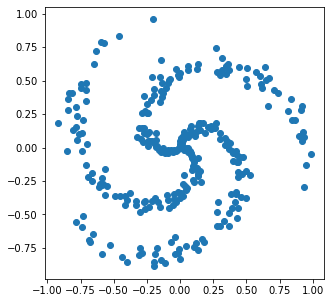

In [4]:
fig = plt.figure(figsize=(5,5))
ax = fig.gca()
ax.scatter(x[:,0],x[:,1])

In [8]:
# 神经网络的实现
import sys
sys.path.append("..")
import numpy as np
from common.layers import Affine, Sigmoid, SoftmaxWithLoss

# 两层神经网络
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size
        
        # 初始化权重和配置
        W1 = 0.01 * np.random.randn(I, H)
        b1 = np.zeros(H)
        W2 = 0.01 * np.random.randn(H, O)
        b2 = np.zeros(O)
        
        # 生成层
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        self.loss_layer = SoftmaxWithLoss()
        
        # 将所有的权重整理到列表中
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads
        
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x
    
    def forward(self, x, t):
        score = self.predict(x)
        loss = self.loss_layer.forward(score, t)
        return loss
    
    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

In [12]:
import sys
sys.path.append("..")
import numpy as np
from common.optimizer import SGD
from dataset import spiral
import matplotlib.pyplot as plt

# 设定超参数
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

# 读入数据，生成模型和优化器
x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

# 学习前用的变量
data_size = len(x)
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []

for epoch in range(max_epoch):
    # 打乱数据
    idx = np.random.permutation(data_size)
    x = x[idx]
    t = t[idx]
    
    for iters in range(max_iters):
        batch_x = x[iters*batch_size:(iters+1)*batch_size]
        batch_t = t[iters*batch_size:(iters+1)*batch_size]
        
        # 计算梯度，更新参数
        loss = model# 绘制学习结果
plt.plot(np.arange(len(loss_list)), loss_list, label='train')
plt.xlabel('iterations (x10)')
plt.ylabel('loss')
plt.show()

# 绘制决策边界
h = 0.001
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()]
score = model.predict(X)
predict_cls = np.argmax(score, axis=1)
Z = predict_cls.reshape(xx.shape)
plt.contourf(xx, yy, Z)
plt.axis('off')

# 绘制数据点
x, t = spiral.load_data()
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show().forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)

        total_loss += loss
        loss_count += 1

        if (iters+1) % 10 == 0:
            avg_loss = total_loss / loss_count
            print("| epoch %d | iter %d / %d | loss %.2f"
                  % (epoch + 1, iters + 1, max_iters, avg_loss))
            loss_list.append(avg_loss)
            total_loss, loss_count = 0, 0

| epoch 1 | iter 10 / 10 | loss 1.13
| epoch 2 | iter 10 / 10 | loss 1.13
| epoch 3 | iter 10 / 10 | loss 1.12
| epoch 4 | iter 10 / 10 | loss 1.12
| epoch 5 | iter 10 / 10 | loss 1.11
| epoch 6 | iter 10 / 10 | loss 1.14
| epoch 7 | iter 10 / 10 | loss 1.16
| epoch 8 | iter 10 / 10 | loss 1.11
| epoch 9 | iter 10 / 10 | loss 1.12
| epoch 10 | iter 10 / 10 | loss 1.13
| epoch 11 | iter 10 / 10 | loss 1.12
| epoch 12 | iter 10 / 10 | loss 1.11
| epoch 13 | iter 10 / 10 | loss 1.09
| epoch 14 | iter 10 / 10 | loss 1.08
| epoch 15 | iter 10 / 10 | loss 1.04
| epoch 16 | iter 10 / 10 | loss 1.03
| epoch 17 | iter 10 / 10 | loss 0.96
| epoch 18 | iter 10 / 10 | loss 0.92
| epoch 19 | iter 10 / 10 | loss 0.92
| epoch 20 | iter 10 / 10 | loss 0.87
| epoch 21 | iter 10 / 10 | loss 0.85
| epoch 22 | iter 10 / 10 | loss 0.82
| epoch 23 | iter 10 / 10 | loss 0.79
| epoch 24 | iter 10 / 10 | loss 0.78
| epoch 25 | iter 10 / 10 | loss 0.82
| epoch 26 | iter 10 / 10 | loss 0.78
| epoch 27 | iter 10 

| epoch 271 | iter 10 / 10 | loss 0.12
| epoch 272 | iter 10 / 10 | loss 0.12
| epoch 273 | iter 10 / 10 | loss 0.12
| epoch 274 | iter 10 / 10 | loss 0.12
| epoch 275 | iter 10 / 10 | loss 0.11
| epoch 276 | iter 10 / 10 | loss 0.12
| epoch 277 | iter 10 / 10 | loss 0.12
| epoch 278 | iter 10 / 10 | loss 0.11
| epoch 279 | iter 10 / 10 | loss 0.11
| epoch 280 | iter 10 / 10 | loss 0.11
| epoch 281 | iter 10 / 10 | loss 0.11
| epoch 282 | iter 10 / 10 | loss 0.12
| epoch 283 | iter 10 / 10 | loss 0.11
| epoch 284 | iter 10 / 10 | loss 0.11
| epoch 285 | iter 10 / 10 | loss 0.11
| epoch 286 | iter 10 / 10 | loss 0.11
| epoch 287 | iter 10 / 10 | loss 0.11
| epoch 288 | iter 10 / 10 | loss 0.12
| epoch 289 | iter 10 / 10 | loss 0.11
| epoch 290 | iter 10 / 10 | loss 0.11
| epoch 291 | iter 10 / 10 | loss 0.11
| epoch 292 | iter 10 / 10 | loss 0.11
| epoch 293 | iter 10 / 10 | loss 0.11
| epoch 294 | iter 10 / 10 | loss 0.11
| epoch 295 | iter 10 / 10 | loss 0.12
| epoch 296 | iter 10 / 1

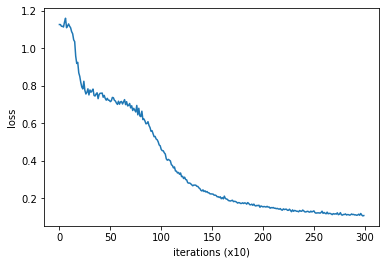

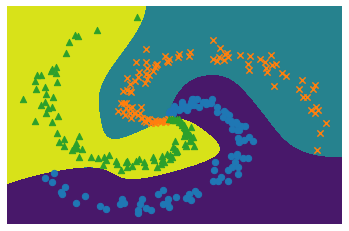

In [14]:
# 绘制学习结果
plt.plot(np.arange(len(loss_list)), loss_list, label='train')
plt.xlabel('iterations (x10)')
plt.ylabel('loss')
plt.show()

# 绘制决策边界
h = 0.001
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()]
score = model.predict(X)
predict_cls = np.argmax(score, axis=1)
Z = predict_cls.reshape(xx.shape)
plt.contourf(xx, yy, Z)
plt.axis('off')

# 绘制数据点
x, t = spiral.load_data()
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()

| epoch 1 |  iter 1 / 10 | time 0[s] | loss 1.10
| epoch 2 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 3 |  iter 1 / 10 | time 0[s] | loss 1.13
| epoch 4 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 5 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 6 |  iter 1 / 10 | time 0[s] | loss 1.10
| epoch 7 |  iter 1 / 10 | time 0[s] | loss 1.14
| epoch 8 |  iter 1 / 10 | time 0[s] | loss 1.16
| epoch 9 |  iter 1 / 10 | time 0[s] | loss 1.11
| epoch 10 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 11 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 12 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 13 |  iter 1 / 10 | time 0[s] | loss 1.10
| epoch 14 |  iter 1 / 10 | time 0[s] | loss 1.09
| epoch 15 |  iter 1 / 10 | time 0[s] | loss 1.08
| epoch 16 |  iter 1 / 10 | time 0[s] | loss 1.04
| epoch 17 |  iter 1 / 10 | time 0[s] | loss 1.03
| epoch 18 |  iter 1 / 10 | time 0[s] | loss 0.94
| epoch 19 |  iter 1 / 10 | time 0[s] | loss 0.92
| epoch 20 |  iter 1 / 10 | time 0[s] | loss 0.92
| epoch 2

| epoch 246 |  iter 1 / 10 | time 0[s] | loss 0.13
| epoch 247 |  iter 1 / 10 | time 0[s] | loss 0.13
| epoch 248 |  iter 1 / 10 | time 0[s] | loss 0.12
| epoch 249 |  iter 1 / 10 | time 0[s] | loss 0.14
| epoch 250 |  iter 1 / 10 | time 0[s] | loss 0.12
| epoch 251 |  iter 1 / 10 | time 0[s] | loss 0.13
| epoch 252 |  iter 1 / 10 | time 0[s] | loss 0.13
| epoch 253 |  iter 1 / 10 | time 0[s] | loss 0.12
| epoch 254 |  iter 1 / 10 | time 0[s] | loss 0.12
| epoch 255 |  iter 1 / 10 | time 0[s] | loss 0.13
| epoch 256 |  iter 1 / 10 | time 0[s] | loss 0.12
| epoch 257 |  iter 1 / 10 | time 0[s] | loss 0.12
| epoch 258 |  iter 1 / 10 | time 0[s] | loss 0.12
| epoch 259 |  iter 1 / 10 | time 0[s] | loss 0.13
| epoch 260 |  iter 1 / 10 | time 0[s] | loss 0.13
| epoch 261 |  iter 1 / 10 | time 0[s] | loss 0.11
| epoch 262 |  iter 1 / 10 | time 0[s] | loss 0.13
| epoch 263 |  iter 1 / 10 | time 0[s] | loss 0.12
| epoch 264 |  iter 1 / 10 | time 0[s] | loss 0.11
| epoch 265 |  iter 1 / 10 | ti

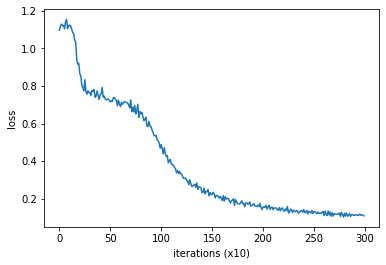

In [25]:
import sys
sys.path.append("..")
from common.optimizer import SGD
from common.trainer import Trainer
from dataset import spiral

max_epoch = 300
batch_sze = 30
hidden_size = 10
learning_rate = 1.0

x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

trainer = Trainer(model, optimizer)
trainer.fit(x, t, max_epoch, batch_size, eval_interval=10)
trainer.plot()

## 1.5 计算的高速化

In [30]:
# 位精度
import numpy as np
a = np.random.randn(3)
print("a.dtype: ", a.dtype)
b = np.random.randn(3).astype(np.float32)
print("b.dtype: ", b.dtype)
c = np.random.randn(3).astype("f")
print("c.dtype: ", c.dtype)

a.dtype:  float64
b.dtype:  float32
c.dtype:  float32
